<a href="https://colab.research.google.com/github/scsanjay/ml_from_scratch/blob/main/04.%20Linear%20Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Custom implementation of Linear Regression with l2 regulariser

In [ ]:
# Very simple implementation of Linear Regression
# TODO: Complex implementation like sklearn's

class LinearRegression():
  """
  It's a very simple implementation of Linear Regression.
  And it is based on Gradient Descent algorithm to minimise the Squared Loss.

  Parameters
  ----------
  iterations : int, default is 1000
  
  Attributes
  ----------
  weights : array of size n_features

  bias : float
  """

  def __init__ (self, iterations=100):
    self.iterations = iterations

  def fit (self, X_train, Y_train):
    """
    It will fit a line to the given training data.

    Parameters
    ----------
    X_train : array of shape (n_samples, n_features)

    Y_train : array of shape (n_samples)

    Returns
    -------
    self : object
    """

    # total dimensions
    feature_nums = 1

    # initialisation of weights
    W = np.random.normal(size=feature_nums)

    # initialisation of bias
    b = np.random.normal(size=1)
    
    for k in range(self.iterations):
      # learning rate such that it reduces over each iterations
      learningRate = 0.001 / ((k+1)**.5)

      weight_gradients = np.zeros(feature_nums)
      bias_gradient = 0

      # implementation of gradient descent
      for (x_i, y_i) in zip(X_train, Y_train):
        x_i = np.array(x_i)

        # calculate gradients with l2 regularisations
        weight_gradients = np.add(weight_gradients, (-2 * x_i) * (y_i - np.dot(W, x_i) + b)) + 2*np.sum(W)
        bias_gradient = bias_gradient + (-2 * (y_i - np.dot(W, x_i) + b))
      
      # update weights and bias based on gradients
      W = W - (learningRate * weight_gradients / len(X_train))
      b = b - (learningRate * bias_gradient / len(X_train))
    
    # set weight and bias attributes
    self.weights = W
    self.bias = b
    return self

  def predict (self, X_test):
    """
    It will predict the output values for the test data.

    Parameters
    ----------
    X_test : array of shape (n_samples, n_features)

    Returns
    -------
    predicted : array of shape (n_samples,)
    """

    predicted = np.empty(len(X_test))

    # loop through each data in test
    for (i, x_i) in enumerate(X_test):
      x_i = np.array(x_i)

      # to predict we calculate y=mx+c
      predicted[i] = np.add(np.dot(self.weights, x_i), self.bias)

    return predicted


## Checking validity of the custom implementation

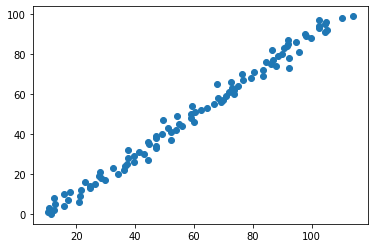

In [ ]:
# Let's create some simple data
X = np.arange(0,100)+np.random.normal(loc=10, scale=3, size=100)
Y = np.arange(0,100)
plt.scatter(X,Y)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.9519507265469294

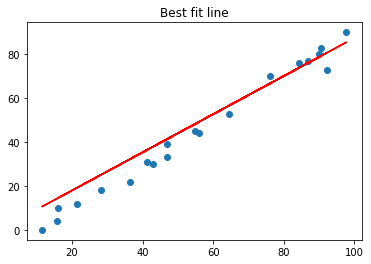

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred, 'r')
plt.title('Best fit line')
plt.show()

**So it seems to be working fine.**